In [9]:
import pandas as pd

# Load the dataset
df = pd.read_csv("patientdata.csv")

# Display the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Get basic statistical summary
print(df.describe())


  Scan Number                             Name FD ROI 1 (FD-Traditional)  \
0          16           Adelice Leite da Silva                     0.786   
1          14  Adelita Alves do Espirito Santo                     0.453   
2          84            Alice Pereira Miranda                     1,636   
3          17            Alzira Alves da Silva                     1,215   
4          79           Amariles de Sousa Maia                     1,807   

  FD ROI 1 (FD-Modified) FD ROI 2 (FD-Traditional) FD ROI  (FD-Modified)  \
0                  1,735                     1,099                 1,593   
1                  1,696                     1,348                 1,256   
2                  1,885                     0.876                 1,793   
3                  1,566                     1,285                 1,545   
4                  1,933                     1,120                 1,892   

   Cortical Thickness Pan  Cortical Thickness Trans  BMI  Age  ...  \
0               

In [10]:
print(df.columns)


Index(['Scan Number', 'Name', 'FD ROI 1 (FD-Traditional)',
       'FD ROI 1 (FD-Modified)', 'FD ROI 2 (FD-Traditional)',
       'FD ROI  (FD-Modified)', 'Cortical Thickness Pan',
       'Cortical Thickness Trans', 'BMI', 'Age', 'Height', 'Weight',
       'BMD L1-L4', 'T-Score L1-L4', 'Low BMD Spine',
       'Spine Osteoporosis Diagnosis', 'Low BMD Hip',
       'Hip Osteoporosis Diagnosis', 'Unified Diagonosis', 'BMD Femoral Neck',
       'T-Score Femoral Neck', 'BMD Total Femur', 'T-Score Total Femur'],
      dtype='object')


Predict BMD and T-scores using linear regression and 

Predict BMD and T-scores using linear regression and 

Identify problematic column


In [12]:
import pandas as pd

# Load the dataset
df = pd.read_csv("patientdata.csv")

# Check data types of each column
print(df.dtypes)

# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(include=['object']).columns
print("\nNon-Numeric Columns:")
print(non_numeric_cols)

# Check unique values in non-numeric columns
for col in non_numeric_cols:
    print(f"\nColumn: {col}")
    print(df[col].unique())


Scan Number                      object
Name                             object
FD ROI 1 (FD-Traditional)        object
FD ROI 1 (FD-Modified)           object
FD ROI 2 (FD-Traditional)        object
FD ROI  (FD-Modified)            object
Cortical Thickness Pan          float64
Cortical Thickness Trans        float64
BMI                               int64
Age                               int64
Height                            int64
Weight                          float64
BMD L1-L4                       float64
T-Score L1-L4                   float64
Low BMD Spine                   float64
Spine Osteoporosis Diagnosis    float64
Low BMD Hip                     float64
Hip Osteoporosis Diagnosis      float64
Unified Diagonosis              float64
BMD Femoral Neck                float64
T-Score Femoral Neck            float64
BMD Total Femur                 float64
T-Score Total Femur             float64
dtype: object

Non-Numeric Columns:
Index(['Scan Number', 'Name', 'FD ROI 1 (FD-

Handle Non numeric Data


Convert Categorical columns to NUmeric

In [13]:
from sklearn.preprocessing import LabelEncoder

for col in non_numeric_cols:
    df[col] = LabelEncoder().fit_transform(df[col])


Remove Unwanted Rows

In [14]:
df = df[df.applymap(lambda x: x != 'EXCLUÍDA').all(axis=1)]


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv("patientdata.csv")

# Select numeric columns (assumed pre-cleaned for non-numeric issues)
df_numeric = df.select_dtypes(include=['number'])

# Define features and regression targets
features = [col for col in df_numeric.columns if col not in ['BMD Femoral Neck', 'BMD Total Femur', 'T-Score Femoral Neck', 'T-Score Total Femur', 'Unified Diagonosis']]
X = df_numeric[features]
y_bmd_tscore = df_numeric[['BMD Femoral Neck', 'BMD Total Femur', 'T-Score Femoral Neck', 'T-Score Total Femur']]

# Impute missing values in features
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_bmd_tscore, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the regression model
reg_model = LinearRegression()
reg_model.fit(X_train_scaled, y_train)

# Predict BMD and T-Scores on test data
y_pred_bmd_tscore = reg_model.predict(X_test_scaled)

print("Regression Model Training Successful!")


Regression Model Training Successful!


In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("patientdata.csv")

# Define regression targets and classification target
regression_targets = ['BMD Femoral Neck', 'BMD Total Femur', 'T-Score Femoral Neck', 'T-Score Total Femur']
class_target = 'Unified Diagonosis'  # Ensure this matches your dataset exactly

# Define features from the original DataFrame (excluding targets)
features = [col for col in df.columns if col not in regression_targets + [class_target]]

# Restrict to numeric columns: only keep features that are numeric
df_numeric = df.select_dtypes(include=[np.number])
available_features = [col for col in features if col in df_numeric.columns]

# Create feature matrix X and regression targets y
X = df_numeric[available_features]
y_reg = df[regression_targets]  # using original df to keep potential numeric types intact

# Impute missing values in features
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Convert imputed array back to DataFrame to retain column names and index
X_imputed = pd.DataFrame(X_imputed, columns=available_features, index=X.index)

# Split Data for Regression
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_reg, test_size=0.2, random_state=42)

# Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear Regression Model
reg_model = LinearRegression()
reg_model.fit(X_train_scaled, y_train)

# Predict BMD and T-Scores
y_pred_reg = reg_model.predict(X_test_scaled)
df_pred_reg = pd.DataFrame(y_pred_reg, columns=regression_targets, index=y_test.index)

print("Regression Model Training Successful!")

# (Now you can proceed with the second stage for classification using df_pred_reg.)


Regression Model Training Successful!


Classification Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion Matrix:
[[10  0]
 [ 0 10]]


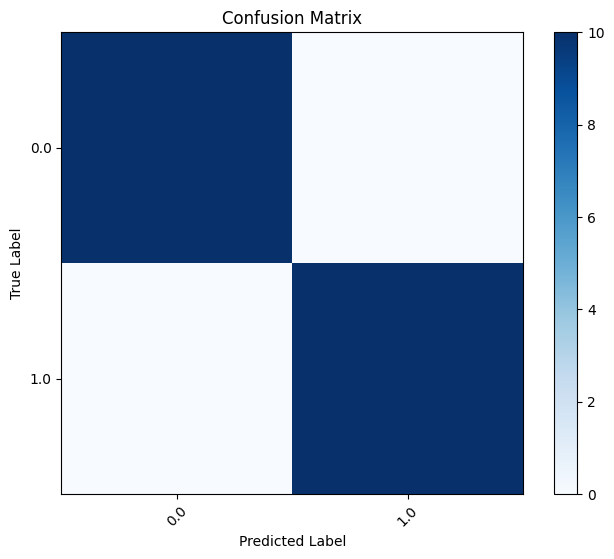

In [24]:
# Retrieve the Unified Diagonosis values corresponding to the test set.
y_class = df.loc[y_test.index, class_target]

# Use the predicted regression outputs (BMD and T-Scores) as new features.
X_class = df_pred_reg  # df_pred_reg contains predicted regression targets

# Scale these features if not already scaled (here we assume they are scaled from previous steps)
# X_class_scaled = scaler_class.fit_transform(X_class)  # If needed

# Remove rows where y_class is NaN
mask = y_class.notna()
y_class_clean = y_class[mask]
X_class_clean = pd.DataFrame(X_class, index=y_class.index).loc[mask]

# If you need scaling for classification features, you can do that here:
scaler_class = StandardScaler()
X_class_clean_scaled = scaler_class.fit_transform(X_class_clean)

# Train Logistic Regression classifier with the cleaned data
log_reg = LogisticRegression(max_iter=5000, solver='saga')
log_reg.fit(X_class_clean_scaled, y_class_clean)

# Predict Unified Diagonosis on the cleaned test set using these features
y_pred_class = log_reg.predict(X_class_clean_scaled)

# Evaluate classification performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

acc = accuracy_score(y_class_clean, y_pred_class)
print(f"Classification Accuracy: {acc:.2f}\n")
print("Classification Report:")
print(classification_report(y_class_clean, y_pred_class))
print("Confusion Matrix:")
cm = confusion_matrix(y_class_clean, y_pred_class)
print(cm)

# Plot the Confusion Matrix
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_class_clean)))
plt.xticks(tick_marks, np.unique(y_class_clean), rotation=45)
plt.yticks(tick_marks, np.unique(y_class_clean))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Regression Performance:
BMD Femoral Neck - MSE: 0.00, R²: 0.86
BMD Total Femur - MSE: 0.01, R²: 0.84
T-Score Femoral Neck - MSE: 0.25, R²: 0.86
T-Score Total Femur - MSE: 0.34, R²: 0.84

Classification Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion Matrix:
[[10  0]
 [ 0 10]]

Classification MSE: 0.00, R²: 1.00


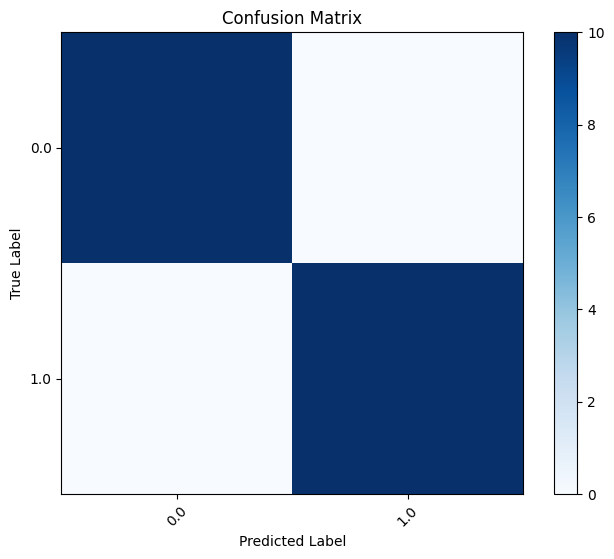

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# -------------------------------
# Stage 0: Load Dataset
# -------------------------------
df = pd.read_csv("patientdata.csv")

# Define regression targets and classification target
regression_targets = ['BMD Femoral Neck', 'BMD Total Femur', 'T-Score Femoral Neck', 'T-Score Total Femur']
class_target = 'Unified Diagonosis'  # Ensure this matches exactly with your dataset

# Define features: use all columns except the regression targets and classification target
features = [col for col in df.columns if col not in regression_targets + [class_target]]

# Restrict to numeric columns only
df_numeric = df.select_dtypes(include=[np.number])
available_features = [col for col in features if col in df_numeric.columns]

# Create feature matrix X for regression and regression target y_reg
X = df_numeric[available_features]
y_reg = df[regression_targets]  # Use original dataframe to ensure proper types

# -------------------------------
# Stage 1: Regression Model to Predict BMD and T-Scores
# -------------------------------

# Impute missing values in features
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X_imputed = pd.DataFrame(X_imputed, columns=available_features, index=X.index)

# Split Data for Regression (preserve indices)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_reg, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_reg = reg_model.predict(X_test_scaled)
df_pred_reg = pd.DataFrame(y_pred_reg, columns=regression_targets, index=y_test.index)

# Evaluate Regression Performance
print("Regression Performance:")
for target in regression_targets:
    mse_reg = mean_squared_error(y_test[target], df_pred_reg[target])
    r2_reg = r2_score(y_test[target], df_pred_reg[target])
    print(f"{target} - MSE: {mse_reg:.2f}, R²: {r2_reg:.2f}")

# -------------------------------
# Stage 2: Classification Using Regression Predictions as Features
# -------------------------------

# Retrieve Unified Diagonosis values corresponding to the regression test set indices
y_class = df.loc[y_test.index, class_target]

# Use predicted regression outputs as features for classification
X_class = df_pred_reg

# Remove rows with missing classification target values (if any)
mask = y_class.notna()
y_class_clean = y_class[mask]
X_class_clean = pd.DataFrame(X_class, index=y_class.index).loc[mask]

# Optional: Standardize classification features
scaler_class = StandardScaler()
X_class_clean_scaled = scaler_class.fit_transform(X_class_clean)

# Train Logistic Regression classifier
log_reg = LogisticRegression(max_iter=5000, solver='saga')
log_reg.fit(X_class_clean_scaled, y_class_clean)

# Predict classification labels
y_pred_class = log_reg.predict(X_class_clean_scaled)

# Evaluate Classification Performance using conventional metrics
print("\nClassification Accuracy:", accuracy_score(y_class_clean, y_pred_class))
print("\nClassification Report:")
print(classification_report(y_class_clean, y_pred_class))
print("Confusion Matrix:")
cm = confusion_matrix(y_class_clean, y_pred_class)
print(cm)

# Additionally, compute MSE and R² for classification (treating 0 and 1 as numeric)
mse_class = mean_squared_error(y_class_clean, y_pred_class)
r2_class = r2_score(y_class_clean, y_pred_class)
print(f"\nClassification MSE: {mse_class:.2f}, R²: {r2_class:.2f}")

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_class_clean)))
plt.xticks(tick_marks, np.unique(y_class_clean), rotation=45)
plt.yticks(tick_marks, np.unique(y_class_clean))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


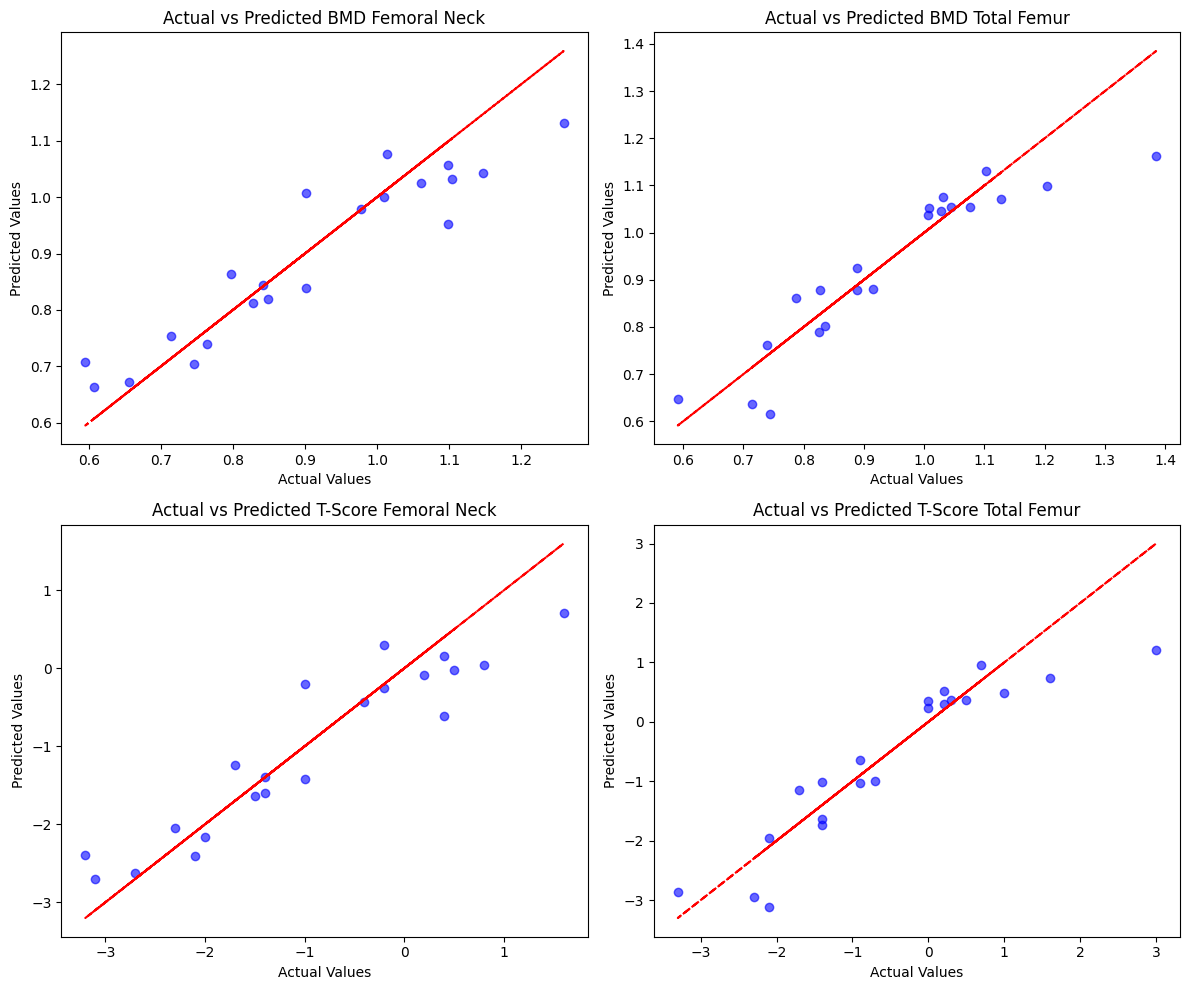

In [26]:
import matplotlib.pyplot as plt

# Convert y_test and y_pred_reg to DataFrames with matching indices
df_real_vs_pred = pd.DataFrame({
    "Real BMD Femoral Neck": y_test["BMD Femoral Neck"],
    "Predicted BMD Femoral Neck": df_pred_reg["BMD Femoral Neck"],
    "Real BMD Total Femur": y_test["BMD Total Femur"],
    "Predicted BMD Total Femur": df_pred_reg["BMD Total Femur"],
    "Real T-Score Femoral Neck": y_test["T-Score Femoral Neck"],
    "Predicted T-Score Femoral Neck": df_pred_reg["T-Score Femoral Neck"],
    "Real T-Score Total Femur": y_test["T-Score Total Femur"],
    "Predicted T-Score Total Femur": df_pred_reg["T-Score Total Femur"]
})

# -------------------------------
# Plot Real vs Predicted Values
# -------------------------------
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

targets = ["BMD Femoral Neck", "BMD Total Femur", "T-Score Femoral Neck", "T-Score Total Femur"]
for i, target in enumerate(targets):
    row, col = divmod(i, 2)
    axs[row, col].scatter(df_real_vs_pred[f"Real {target}"], df_real_vs_pred[f"Predicted {target}"], color='blue', alpha=0.6)
    axs[row, col].plot(df_real_vs_pred[f"Real {target}"], df_real_vs_pred[f"Real {target}"], color='red', linestyle='dashed')  # Perfect prediction line
    axs[row, col].set_title(f"Actual vs Predicted {target}")
    axs[row, col].set_xlabel("Actual Values")
    axs[row, col].set_ylabel("Predicted Values")

plt.tight_layout()
plt.show()


Lasso Regression- Helps remove irrelevant features


In [27]:
from sklearn.linear_model import Ridge, Lasso


lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
print("R^2 Lasso:", lasso.score(X_test, y_test))


R^2 Lasso: 0.7089893741211883


In [28]:
ridge = Ridge(alpha=1.0)  # Tune alpha using cross-validation
ridge.fit(X_train, y_train)
print("R^2 Ridge:", ridge.score(X_test, y_test))

R^2 Ridge: 0.8569913912592916
